In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date,datetime
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
#xls=pd.ExcelFile('HospitalDatabase.xlsx')
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR=pd.read_excel(xls,'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA=pd.read_excel(xls,'Patients')
#Reading the EDVisits sheet
df_EDV=pd.read_excel(xls,'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV=pd.read_excel(xls,'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

## 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.¶

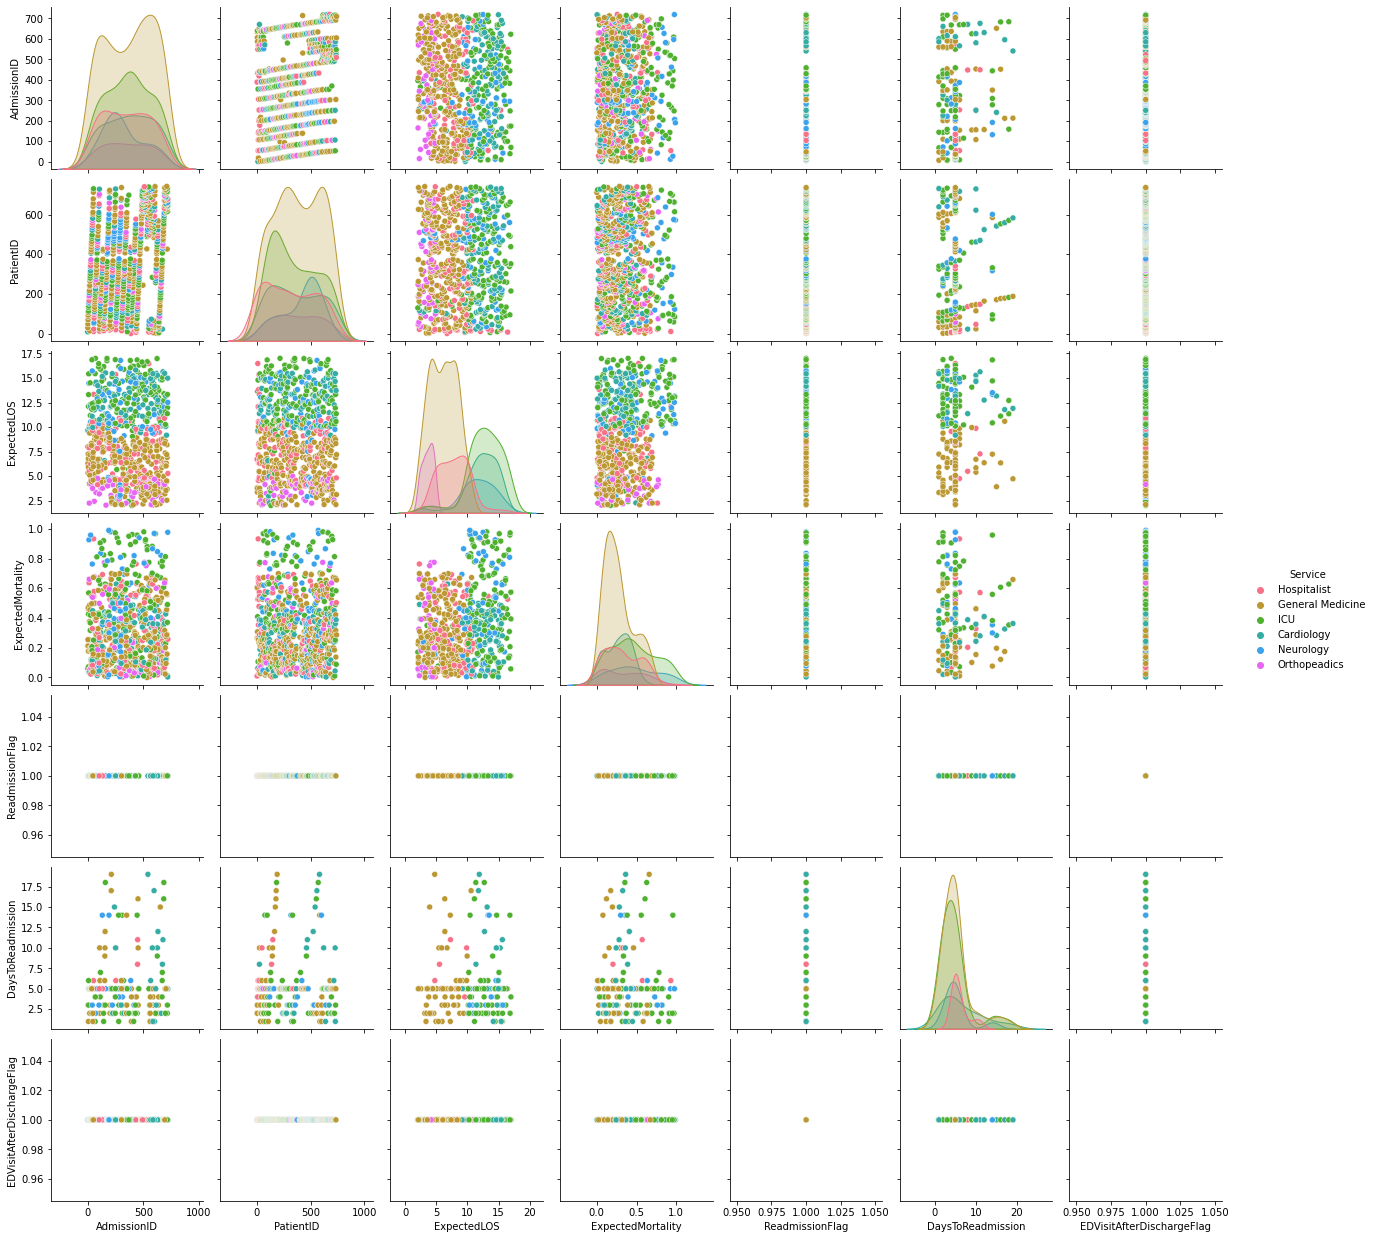

In [3]:
sns.pairplot(df_RR,hue="Service",palette="husl")
plt.show()

## 2.Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [4]:
df_PA.iloc[101:201,1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


### 3."Create a figure object called fig using plt.figure() **
 ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 ** Plot (x,y) on that axes and set the labels.
 Note : You can plot on any x,y set of values."

Text(0.5, 1.0, 'Figure Chart')

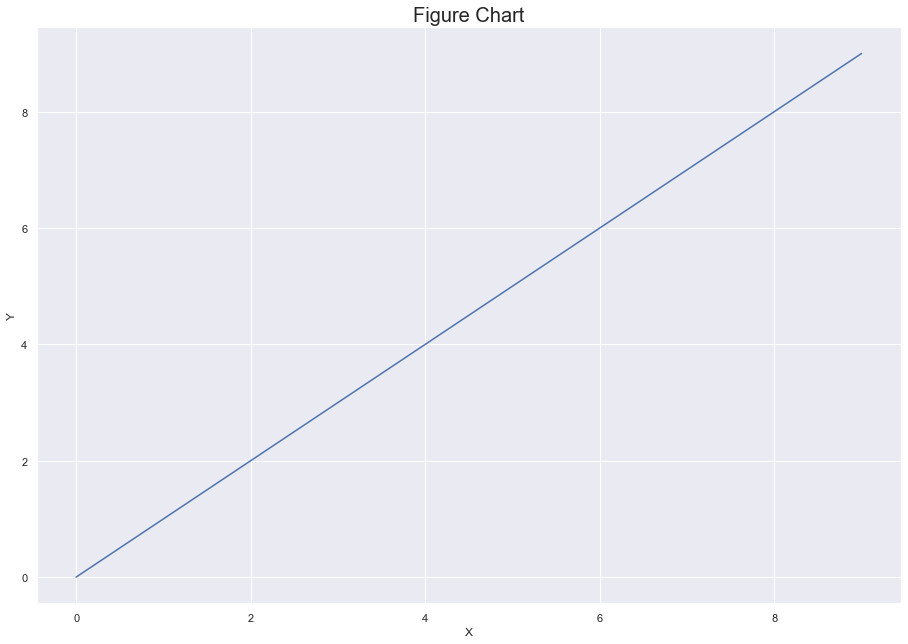

In [5]:
sns.set(style="darkgrid")
x=range(0,10)
y=range(0,10)
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Figure Chart",fontsize=20)

## 4 Display data by splitting age in 4 quartiles and labeling the quartiles.


In [6]:
from datetime import date
today = date.today()
df_PA['year'] = df_PA["DateOfBirth"].dt.year #extracting year from DateOfbirth 
df_age=today.year-df_PA['year']
df_age.sort_values()
print("Q1 quantile of AGE : ", np.quantile(df_age, .25, interpolation='midpoint'))
print("Q2 quantile of AGE : ", np.quantile(df_age, .50, interpolation='midpoint'))
print("Q3 quantile of AGE : ", np.quantile(df_age, .75, interpolation='midpoint'))
print("Q4 quantile of AGE : ", np.quantile(df_age, 1.00, interpolation='midpoint'))


Q1 quantile of AGE :  43.0
Q2 quantile of AGE :  50.0
Q3 quantile of AGE :  57.0
Q4 quantile of AGE :  63.0


# 5.Display full name of patients who are born in 1986.

In [7]:
#df_PA.head()
df_PA["FullName"] = df_PA["FirstName"] + ' ' + df_PA["LastName"]
df_PA["DateOfBirth"] = pd.to_datetime(df_PA["DateOfBirth"])
df_PA['year'] = df_PA["DateOfBirth"].dt.year #extracting year from DateOfbirth

New_df_PA=df_PA[df_PA['year']==1986] #Result dataframe
New_df_PA[["FullName","year"]]

,FullName,year
23,Gabriel Joseph,1986
24,Lincoln Brenda,1986
29,Ala Halpert,1986
72,Lolita Darci,1986
164,Fadel Bernardt,1986
238,Bentley Kippax,1986
367,Vale Olanda,1986
373,Britt Dureden,1986
386,Cristabel Chatel,1986
415,Constantia Group,1986


## 6.Create a jointplot on expected mortality & expected length of stay

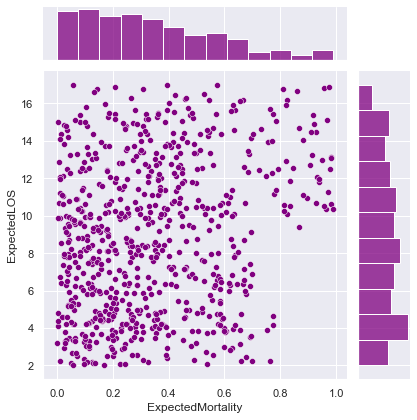

In [8]:
df_EMEL=df_RR
sns.jointplot(data=df_EMEL,x='ExpectedMortality',y='ExpectedLOS',color='PURPLE')
plt.show()

## 7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

<Figure size 864x360 with 0 Axes>

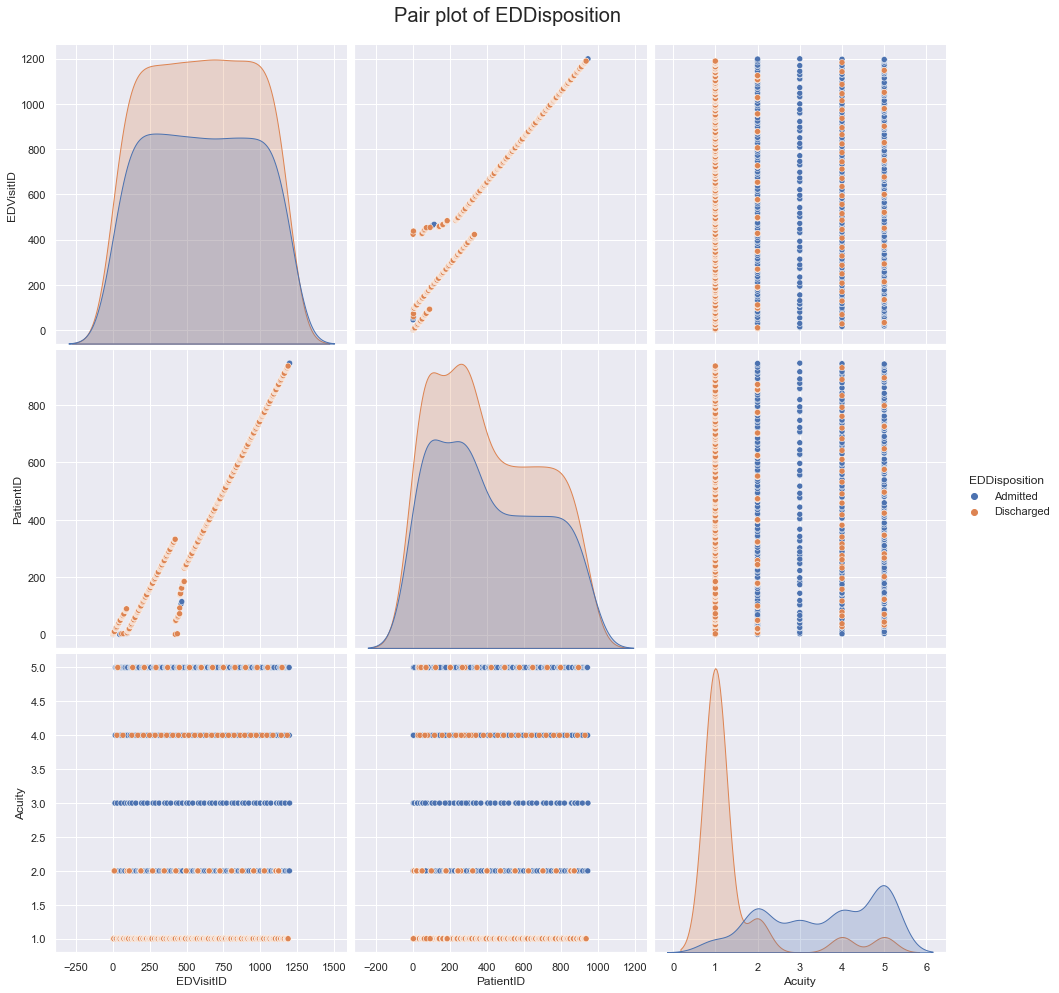

In [9]:
plt.figure(figsize=(12,5))

sns.pairplot(df_EDV, hue='EDDisposition',height=4.5)
plt.title("Pair plot of EDDisposition",y=3.1,x=-0.5,fontsize=20)
plt.show()

## 8 Create a bar chart between expectedLOS & Primary diagnosis.

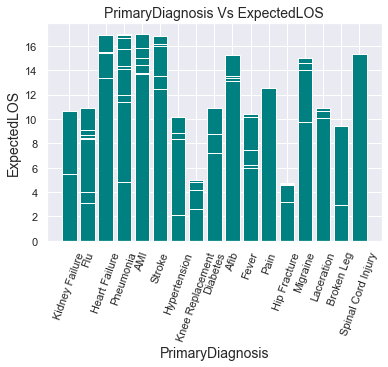

In [10]:
plt.bar(df_RR['PrimaryDiagnosis'], height=df_RR['ExpectedLOS'], color='teal')
plt.title('PrimaryDiagnosis Vs ExpectedLOS', fontsize=14)
plt.xlabel('PrimaryDiagnosis', fontsize=14)
plt.ylabel('ExpectedLOS', fontsize=14)
plt.grid(True)
plt.xticks(rotation=70)
plt.show()

## 9.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [11]:
#isin() method checks if DataFrame contains the specified values
New_df=df_PA[~df_PA['PatientID'].isin(df_RR['PatientID'])] # (~) in pandas is Boolean Not
print(list(New_df['PatientID']))

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

## 10.Create a boxplot on ExpectedLOS by taking service into account.

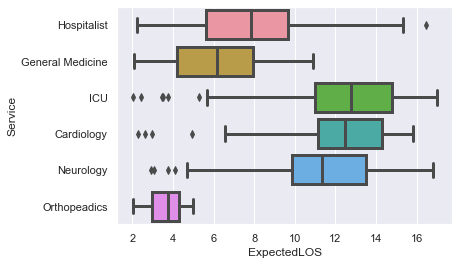

In [12]:
#create your own color array
my_colors = ["#9b59b6", "#3498db", 
            "#2ecc71", "#006a4e"]
  
# add color array to set_palette
# function of seaborn
sns.set_palette( my_colors )
df_ELOS=df_RR  
sns.boxplot(x='ExpectedLOS',y='Service',data=df_ELOS,linewidth=3)
plt.show()

## 11 Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

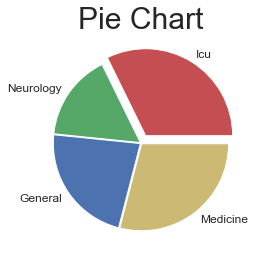

In [13]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
outside=(0.5,0.6,0.2)
plt.pie(ExpectedLOS,labels=Service, colors=['r','g','b','y'],explode=(0.1,0.01,0.01,0.01),textprops={'fontsize': 12})
plt.title('Pie Chart',fontsize=30)
plt.show()

## 12 Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T. (Attach screenshots for this question)

In [14]:
import psycopg2

conn = psycopg2.connect(
   database="HospitalDB_New", user='postgres', password='tej', host='::1', port= 5432
)
cursor = conn.cursor()

cursor.execute('''Select "ProviderName" from "Providers" where "ProviderName" like 'T%' ''')
# Fetch all rows from database
record = cursor.fetchall()
print("Data from Database:- ", record)
conn.commit()
cursor.close()
conn.close()

Data from Database:-  [('Ted Texas',), ('Ted Green',), ('Ted Black',), ('Tyler Conner',), ('Tony Creed',), ('Trent Tye',)]


## 13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.

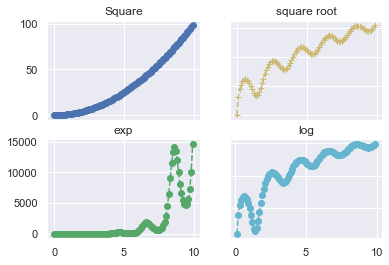

In [15]:
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi*x)+x

# creating the canvas with class 'fig'
# and it's object 'axes' with '2' row and '2' columns
fig, axes = plt.subplots(2, 2)    #syntax= Plt.subplots(nrows, ncols)
# plotting graph for 1st element
axes[0][0].plot(x, x*x,'b--o')         #square of x , solid line with b=  blue color and o= circlular marker
axes[0][0].set_title('Square')  
# plotting graph for 2nd element
axes[0][1].plot(x,np.sqrt(y),'y--+')   #square root of y, solid line with y = yellow color and +=plus marker
axes[0][1].set_title('square root') 
# plotting graph for 3rd element
axes[1][0].plot(x,np.exp(y) ,'g--o')   #exponential of y 
axes[1][0].set_title('exp')  
# plotting graph for 4th element
axes[1][1].plot(x,np.log10(y),'c--o')
axes[1][1].set_title('log')

for axes in fig.get_axes(): # Hide x labels and tick labels for top plots and y ticks for right plots
    axes.label_outer()
plt.show()

## 14.Find the number of null values in BloodPressureSystolic column.

In [16]:
df_BPS=df_AV
df_BPS['BloodPressureSystolic'].isnull().sum()

124

## 15 Replace all the null values in ReadmissionFlag with 0.

In [17]:
df_RR['ReadmissionFlag'].fillna(0,inplace=True)
df_RR

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


## 16 Plot a graph to show the distribution of expected length of stay

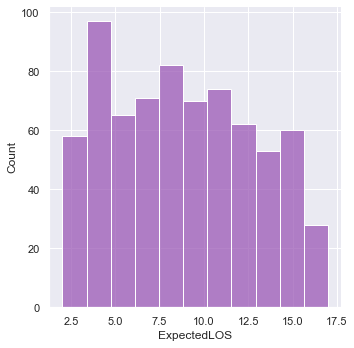

In [18]:
sns.displot(df_RR['ExpectedLOS'],kde=False)

## 17.Create a heat map to show the correlation between the column values of Edvisits.

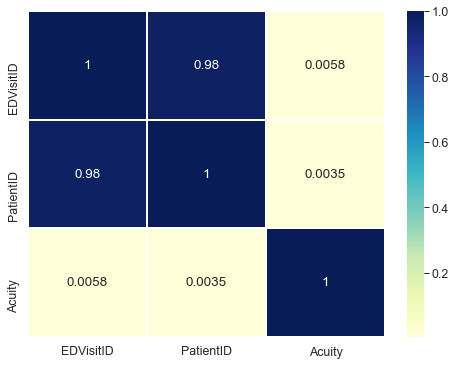

In [19]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

New_df_EDV = df_EDV.corr()
sns.heatmap(New_df_EDV,annot=True, cmap="YlGnBu",linecolor = 'white',linewidth=1)

plt.show()

## 18.Add column 'Age' in Patient table.

In [20]:
from datetime import date
df_PT=df_PA
df_PT['Age'] = 1
df_PT
def calculate_age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

df_PT['Age'] = df_PT['DateOfBirth'].apply(calculate_age)
df_PT

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,year,FullName,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,Lanni Sue,63
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,Far Myers,37
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,Devlin Michael,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,Carmine Texas,54
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,Tann Bama,60
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,Wat Fideler,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,Wandie Baythrop,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,Diahann Smeeton,40
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,Panchito Sharple,59


## Q19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [21]:
df_datetime = pd.DataFrame(data={}, columns=['date', 'time'])
df_datetime['date'] = pd.to_datetime(df_RR['DischargeDate']).dt.date
df_datetime['time'] = pd.to_datetime(df_RR['DischargeDate']).dt.time
df_datetime

,date,time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


## 20 Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [22]:

print(df_RR.groupby(['Service', 'PrimaryDiagnosis']).size().reset_index(name='Patient_Count'))

             Service    PrimaryDiagnosis  Patient_Count
0         Cardiology                 AMI             40
1         Cardiology                Afib             10
2         Cardiology          Broken Leg              3
3         Cardiology                 Flu              2
4         Cardiology       Heart Failure             39
5         Cardiology      Kidney Failure              1
6   General Medicine          Broken Leg              3
7   General Medicine            Diabetes             38
8   General Medicine               Fever             13
9   General Medicine                 Flu             54
10  General Medicine        Hypertension             35
11  General Medicine      Kidney Failure             12
12  General Medicine          Laceration             21
13  General Medicine           Pneumonia             67
14  General Medicine              Stroke             20
15       Hospitalist                 AMI              1
16       Hospitalist          Broken Leg        

## 21.Which demographic patients are prone to get stroke?

In [23]:

#merging 'Patient' and 'ReAdmissionRegistry' DataFrames
df = pd.merge(df_PA,df_RR, on = ['PatientID'], how = 'inner')
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"])
df["BirthYear"] = df["DateOfBirth"].dt.year #extracting Birth Year from DateOFBirth
df["AdmissionDate"] = pd.to_datetime(df["AdmissionDate"])
df["AdmissionYear"] = df["AdmissionDate"].dt.year #extracting year from AdmissionDate
#calculating Age
df["Age"] = df['AdmissionYear'] - df['BirthYear']

#filter the rows where PrimaryDiagnosis is Stroke
df_stroke = df[df["PrimaryDiagnosis"] == 'Stroke']
# count of PatientID group by Race,Gender and sorting it in descending order to get Maximum count of patients
df_stroke.groupby(['Race'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False).head()

,PatientID
Race,
Black/African-American,40
White,28


## 22.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [24]:
df_ACEDD=df_EDV
df_ACEDD[["PatientID","Acuity","EDDisposition"]]
Patient_ct=df_ACEDD.groupby(['Acuity','EDDisposition'])['PatientID'].count().reset_index(name='NoOfPatient')
#print(Patient_ct)
print(Patient_ct.to_string(index=False))

 Acuity EDDisposition  NoOfPatient
      1      Admitted           32
      1    Discharged          558
      2      Admitted          116
      2    Discharged           66
      3      Admitted           81
      4      Admitted          107
      4    Discharged           30
      5      Admitted          179
      5    Discharged           30


## 23 Write a function to find the center element in the list. (one element in odd length list,  two elements in even length list).

In [25]:
input_list1=[2,7,4,4,2,7,8,9,0]
input_list2=[2,7,4,4,2,7,8,9]
def findcenter(input_list):
    center_element= float(len(input_list))/2
    if center_element % 2 != 0:
        return input_list[int(center_element - .5)]
    else:
        return (input_list[int(center_element)], input_list[int(center_element-1)])
center1=findcenter(input_list1)
print(center1)
center2=findcenter(input_list2)
print(center2)

2
(2, 4)


## 24 Get the number of patients based on ReasonForVisit and EDDisposition [used stack functions].

In [26]:
df=pd.pivot_table(data=df_EDV, index=["ReasonForVisit","EDDisposition"], values='PatientID', aggfunc='count')
print("Stacked DataFrame:\n", df.stack())

Stacked DataFrame:
 ReasonForVisit       EDDisposition           
Accident             Admitted       PatientID     39
Bleeding             Admitted       PatientID     16
                     Discharged     PatientID     15
Car Accident         Admitted       PatientID     17
Chest Pain           Admitted       PatientID     94
                     Discharged     PatientID     15
Cough                Discharged     PatientID      1
Fever                Admitted       PatientID     46
                     Discharged     PatientID    188
Gun Shot             Admitted       PatientID     16
Intoxication         Discharged     PatientID     30
Laceration           Discharged     PatientID     30
Migraine             Admitted       PatientID     47
                     Discharged     PatientID    109
Pneumonia            Admitted       PatientID    136
                     Discharged     PatientID     65
Shortness of Breath  Admitted       PatientID     72
                     Discharged  

## 25.Plot a graph by counting the no. of patients in each department

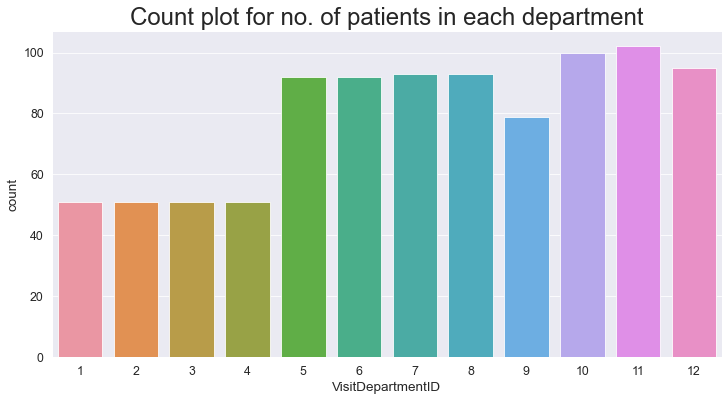

In [27]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='VisitDepartmentID',data=df_AV)
plt.title("Count plot for no. of patients in each department",fontsize=24)
plt.show()

## 26.Using arrays and loops, find the count of patients based on gender.

In [28]:
column_as_np=df_PA[df_PA.columns[4]].to_numpy()
Male_count = 0
Female_count = 0
for element in column_as_np:
    if element == "Male":
     Male_count += 1
    elif element == "Female":
     Female_count += 1
print("Male_count:",Male_count,"Female_count:",Female_count)  

Male_count: 537 Female_count: 408


## 27.Plot a graph to count the patients based on discharge disposition.

<AxesSubplot:title={'center':'Discharge Disposition'}, xlabel='DischargeDisposition', ylabel='Count of Patients'>

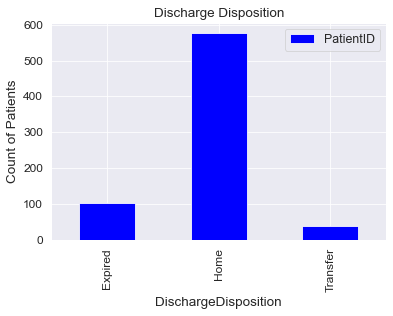

In [29]:
df=df_D.groupby(['DischargeDisposition'])[['PatientID']].count()
df.plot(kind='bar',title='Discharge Disposition',ylabel='Count of Patients',color=['blue'],fontsize=12,grid=True)

## 28 Which reason of visit has maximum mortality rate.

In [30]:
##RR EDV
df_RR_EDV = df_RR[["PatientID","ExpectedMortality"]].merge(df_EDV[["PatientID","ReasonForVisit"]],
                                                          on = "PatientID")
df_RR_EDV_New=max(df_RR_EDV['ExpectedMortality'])
df_pat=df_RR_EDV[df_RR_EDV['ExpectedMortality']==df_RR_EDV_New]
print(df_pat)

     PatientID  ExpectedMortality ReasonForVisit
816        572           0.989945      Pneumonia


## 29.Calculate average LOS.

In [31]:
# by using mean() function
df_RR["ExpectedLOS"].mean()

8.824589159156156

## 30.Which patient id has most entries in readmission registry.

In [32]:
df_ENTRIES=df_RR
df_pc = df_ENTRIES.groupby(['PatientID'])['PatientID'].count().reset_index(name='ptcount')
df_max=df_pc[df_pc.ptcount == df_pc.ptcount.max()]
print(df_max.to_string(index=False))

 PatientID  ptcount
        23        3


## 31 Find the count of White Spanish Male.

In [33]:
Count=df_PA['PatientID'][(df_PA['Race']=='White') & (df_PA['Language']=='Spanish') & (df_PA['Gender']=='Male')].count()
Count

15

## 32 If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name

In [34]:
#df_PA['Name'] = 'Mr ' + df_PA['FirstName'] + ' ' + df_PA['LastName']
df_Mname=df_PA[df_PA['Gender']=='Male']
df_Fname=df_PA[df_PA['Gender']=='Female']
print('Mr ' + df_Mname.FirstName + ' ' + df_Mname.LastName )
print('Ms ' + df_Fname.FirstName + ' ' + df_Fname.LastName )

0             Mr Lanni Sue
1             Mr Far Myers
2       Mr Devlin  Michael
3         Mr Carmine Texas
4            Mr Tann  Bama
              ...         
940         Mr Wat Fideler
941     Mr Wandie Baythrop
942     Mr Diahann Smeeton
943    Mr Panchito Sharple
944        Mr Walsh Calvie
Length: 537, dtype: object
25           Ms Sally Bing
26            Ms Mike Bing
27          Ms Jordan Ross
28            Ms Ted Scott
29          Ms Ala Halpert
              ...         
914      Ms Jerrilyn Dyson
915      Ms Kaylil Baldack
916     Ms Velvet Bushnell
917          Ms Kiri Allom
918    Ms Champlin Bulford
Length: 408, dtype: object


## 33. Using a bar chart, which Service had the lowest count of Expected Mortality?

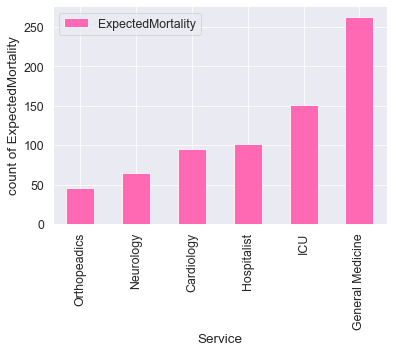

In [35]:
df_D.groupby(["Service"])[["ExpectedMortality"]].count().sort_values("ExpectedMortality").plot(kind='bar',ylabel='count of ExpectedMortality',color='hotpink')
plt.show()

## 34.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [36]:
array=np.arange(1,31).reshape(6,5)
print(array[2:4,0:2])

[[11 12]
 [16 17]]


## 35.np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [37]:
b=np.arange(1,31).reshape(6,5)
c=b[0:4,1:5]
c.diagonal()

array([ 2,  8, 14, 20])

## 36 Create a correlation matrix on EDVisits.

In [38]:
corr_matrix = df_EDV.corr()
print(corr_matrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


## 37.Write a function to print all the upper case letter of a given sentence.

In [88]:
# take input
string = input('Enter any string: ')
upper = ''
for char in string:
    #check uppercase characters
    if char.isupper():
        upper += char

# print uppercase characters
print('Uppercase characters:', upper)

Enter any string: Exploratory Data Analysis
Uppercase characters: EDA


## 38.Number of patients on 'Transfer' based on primary diagnosis.

In [40]:
df_TPD=df_D
df_pt=df_TPD[['PatientID','DischargeDisposition','PrimaryDiagnosis']]
df_transferpt = df_pt[df_pt.DischargeDisposition == "Transfer"]
Transfer_Patient=df_transferpt.groupby(['PrimaryDiagnosis'])['PrimaryDiagnosis'].count().reset_index(name='count')
print(Transfer_Patient)

   PrimaryDiagnosis  count
0              Afib      1
1          Diabetes      7
2               Flu      2
3     Heart Failure      9
4  Knee Replacement      1
5        Laceration      1
6              Pain      1
7         Pneumonia      8
8            Stroke      9


## 39. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [41]:
df = pd.merge(df_PA,df_EDU, how="inner", on=["PatientID"])
ls = df['ReasonForVisit']=='Migraine'
df.loc[ls][['FirstName','LastName','DateOfBirth','ReasonForVisit']]

,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


## 40 Plot a graph showing the count of patients for the reason visited the hospital.

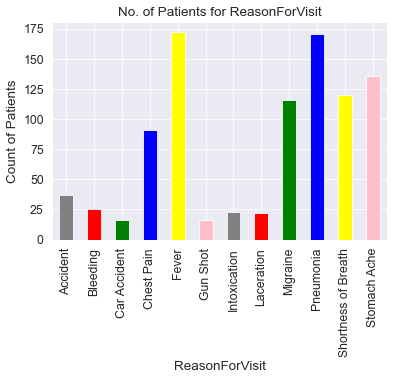

In [42]:
df_EDU.groupby(["ReasonForVisit"])["PatientID"].count().plot(kind='bar',color=['gray', 'red', 'green', 'blue', 'yellow','pink'],ylabel='Count of Patients',xlabel='ReasonForVisit',title='No. of Patients for ReasonForVisit')
plt.show()

## 41. Find the visit type with maximum 'No Show'

In [43]:
#Approach -1
#groupby 'VisitType' and count number of 'VisitStatus' equal to 'No Show'
#used 'apply' and 'lambda'  to filter 'No Show' values
max_no_show=df_AV.groupby("VisitType")["VisitStatus"].apply(lambda x: (x== 'No Show').sum()).reset_index(name='count of No-Show').sort_values(by="count of No-Show",ascending=False).head(1)
max_no_show

,VisitType,count of No-Show
3,Telemedicine,74


## 42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [44]:
df_DETAILS=df_P.loc[((df_P['ProviderID'] >= 11) & (df_P['ProviderID'] <= 20) )
             & (df_P['ProviderSpecialty'] == 'Surgery')]
print(df_DETAILS.to_string(index=False))

 ProviderID    ProviderName ProviderSpecialty     ProviderDateOnStaff
         11    Kim Kimberly           Surgery 1998-05-10 14:47:29.468
         12        Sarah Ab           Surgery 1998-08-18 05:22:40.762
         13 Abigail Marriot           Surgery 1998-11-08 12:25:45.705
         14         Dave Yu           Surgery 1999-06-26 16:18:57.436
         15 Christian Saint           Surgery 2000-08-27 00:12:40.326
         16    Perry Pardon           Surgery 2001-02-13 11:49:17.862


## 43. In question 34, when the value is less than 6, print as -1,else print 99.

In [45]:
my_array=np.arange(1,31).reshape(6,5)
my_array = np.where(my_array < 6, -1, 99)
print(my_array)

[[-1 -1 -1 -1 -1]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]]


## 44 Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [46]:

pd.pivot_table(data=df_D, index=["Service","PrimaryDiagnosis"], values='ExpectedLOS', aggfunc='mean')

ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fever                  8.865651
                 Flu                    7.033979
                 Hypertension           7.864913
                 Kidney Failure         7.850346
                 Knee Replacement       2.255705
                 Laceration             7.069360
                 Pneumonia              8.146240
                 Stroke                15.349671
ICU              AMI                   12.503213
                 Afib                   9.651522
                 Fever                  3.860693
                 Flu                    4.953871
                 Heart Failure         12.784620
                 Hypertension           5.092533
                 Kidney Failure         9.045995
                 Laceration            10.101443
                 Pneumonia             13.523626
                 Spinal Cord Injury    15.276540
                 Stroke                13.297978
Neurology        AMI                   10.482847
                 Flu                    6.700593
                 Heart Failure         12.737565
                 Hypertension           4.276454
                 Migraine              12.202213
                 Pain                  11.441453
                 Pneumonia              7.527330
                 Stroke                12.745608
Orthopeadics     Hip Fracture           3.474971
                 Knee Replacement       3.702839

## 45.Calculate mortality by diagnosis.

In [47]:
#groupby 'PrimaryDiagnosis' and count number of 'DischargeDisposition' equal to 'Expired'
df_RR.groupby('PrimaryDiagnosis')["DischargeDisposition"].apply(lambda x: (x=='Expired').sum()).reset_index(name='Mortality')

,PrimaryDiagnosis,Mortality
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4
5,Flu,11
6,Heart Failure,16
7,Hip Fracture,3
8,Hypertension,16
9,Kidney Failure,2


## 46.Write a code to split a sentence into words using regex.

In [48]:
Sentence = "John, is learning Python!"
x = re.split("\s",Sentence)
print(x)
for y in x:
    print(y)

['John,', 'is', 'learning', 'Python!']
John,
is
learning
Python!


## 47 Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [49]:
max_Id = df_AV['BloodPressureSystolic'].idxmax()
df_AV.loc[max_Id]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

## 48 Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [50]:
pd.pivot_table(data=df_D, index=["Service","DischargeDisposition"], values='ExpectedLOS', aggfunc='mean')

ExpectedLOS
Service          DischargeDisposition             
Cardiology       Expired                  9.202626
                 Home                    12.864936
                 Transfer                11.818403
General Medicine Expired                  5.874003
                 Home                     6.105696
                 Transfer                 6.116124
Hospitalist      Expired                  6.775636
                 Home                     8.009046
                 Transfer                 5.701389
ICU              Expired                  9.919063
                 Home                    13.451158
                 Transfer                11.989238
Neurology        Expired                  9.384312
                 Home                    12.538859
                 Transfer                11.469198
Orthopeadics     Expired                  3.943883
                 Home                     3.508337
                 Transfer                 4.842255

## 49.Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)

In [51]:
#filtering the rows with SBP>180 and DBP>120
SBP=df_AV['BloodPressureSystolic']>180
DBP=df_AV['BloodPressureDiastolic']>120
a=df_AV.loc[SBP & DBP]

print("patients with out duplicates:")
print(len(a.PatientMRN.drop_duplicates()))
print("patients with duplicates:")
print(len(a))

patients with out duplicates:
87
patients with duplicates:
101


## 50.Which departmentID has maximum number of visits scheduled.

In [52]:
df_MAXIMUM=df_AV
df_NoOfVisitsScheduled = df_MAXIMUM.groupby(['VisitDepartmentID'])['VisitDepartmentID'].count().reset_index(name='Visitcount')
df_MaxVisits=df_NoOfVisitsScheduled[df_NoOfVisitsScheduled.Visitcount == df_NoOfVisitsScheduled.Visitcount.max()]
print(df_MaxVisits.to_string(index=False))

 VisitDepartmentID  Visitcount
                11         102


## 51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [53]:
df_EDV[(df_EDV["ReasonForVisit"].isin(["Migraine", "Pneumonia"])) & (df_EDV["Acuity"] >= 2)] 

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1107,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
1150,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
1152,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
1160,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


## 52 Retrieve the row with minimum DBP using sorting technique.

In [54]:
df_AV_NEW=df_AV.sort_values(by=['BloodPressureDiastolic'])
df_AV_NEW.head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


## 53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [55]:
df_cnt=df_EDV.groupby(["ReasonForVisit"])["PatientID"].count()
print(df_cnt)
df_edv = df_EDV[["ReasonForVisit"]]
user_input = input("Enter the reason for visit: ") #Getting the Reason for Visit from the user
edv = df_edv.loc[df_edv["ReasonForVisit"] == user_input].count() #Checking the condition and displaying the count
display(edv)

ReasonForVisit
Accident                39
Bleeding                31
Car Accident            17
Chest Pain             109
Cough                    1
Fever                  234
Gun Shot                16
Intoxication            30
Laceration              30
Migraine               156
Pneumonia              201
Shortness of Breath    149
Stomach Ache           186
Name: PatientID, dtype: int64
Enter the reason for visit: 


ReasonForVisit    0
dtype: int64

## 54.Mortality O:E

In [56]:
O_cnt = df_D['PatientID'][df_D['DischargeDisposition']=='Expired'].count() #Count of Expired patients

D_cnt = df_D['DischargeDisposition'].count()#Count of Discharged Patients

#Observed Mortality
Obs_mort = round(O_cnt/D_cnt,4)

#Expected Mortality
Exp_mort = df_D['ExpectedMortality'].mean()

#Mortality O:E
O_E = round(Obs_mort/Exp_mort,3)
print("The Mortality O:E is",O_E)

The Mortality O:E is 0.427


## 55. Create a bar chart on service & expected length of stay.

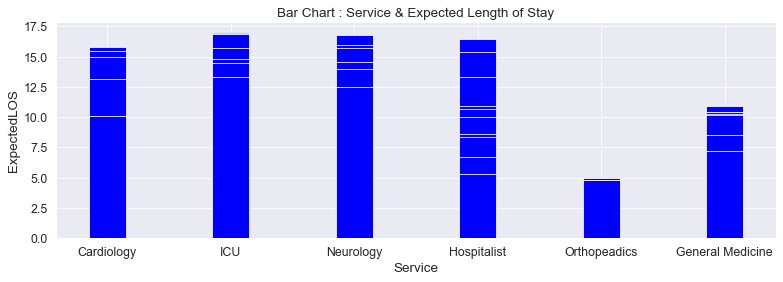

In [60]:
fig = plt.figure(figsize = (10, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_D["Service"],df_D["ExpectedLOS"],color='blue',width=0.3)
plt.xlabel("Service")
plt.ylabel("ExpectedLOS")
plt.title("Bar Chart : Service & Expected Length of Stay")
plt.xticks(rotation = 'horizontal')
plt.show()

## 56 Count of canceled status.

In [58]:
df_AV['VisitStatus'].value_counts()['Canceled']

60

## 57.Find the age prone to get stroke.

In [61]:

#merging 'Patient' and 'ReAdmissionRegistry' DataFrames
df = pd.merge(df_PA,df_RR, on = ['PatientID'], how = 'inner')
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"])
df["BirthYear"] = df["DateOfBirth"].dt.year #extracting Birth Year from DateOFBirth
df["AdmissionDate"] = pd.to_datetime(df["AdmissionDate"])
df["AdmissionYear"] = df["AdmissionDate"].dt.year #extracting year from AdmissionDate
#calculating Age
df["Age"] = df['AdmissionYear'] - df['BirthYear']

#filter the rows where PrimaryDiagnosis is Stroke
df_stroke = df[df["PrimaryDiagnosis"] == 'Stroke']
# count of PatientID group by Race,Gender and sorting it in descending order to get Maximum count of patients
df_stroke.groupby(['Race'])[["PatientID"]].count().sort_values(by="PatientID",ascending=False).head()

,PatientID
Race,
Black/African-American,40
White,28


In [62]:
#for dataframe 'df' reference check question 21
df.groupby('Age')['PrimaryDiagnosis'].apply(lambda x : (x=='Stroke').sum()).sort_values(ascending=False)

Age
57    6
54    6
36    5
53    4
43    4
44    4
33    3
34    3
35    3
38    3
48    3
40    3
51    3
45    2
50    2
56    2
49    2
58    2
47    2
46    1
32    1
52    1
42    1
41    1
37    1
55    0
39    0
31    0
Name: PrimaryDiagnosis, dtype: int64

## 58.Display total count of patients service wise based on gender.

In [63]:
df_PA = pd.read_excel(xls, 'Patients')
df_Total1=df_D[['PatientID','Service']]
df_Total2=df_PA[['PatientID','Gender']]
df_merge=pd.merge(df_Total1,df_Total2,how='inner',on ='PatientID')

df_total=df_merge.groupby(['Service','Gender'])['Gender'].count().reset_index(name='countOfPatient')
df_total

,Service,Gender,countOfPatient
0,Cardiology,Female,41
1,Cardiology,Male,54
2,General Medicine,Female,114
3,General Medicine,Male,149
4,Hospitalist,Female,35
5,Hospitalist,Male,66
6,ICU,Female,65
7,ICU,Male,86
8,Neurology,Female,34
9,Neurology,Male,31


## 59 Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [64]:
df_P_name=df_P[['ProviderName']]
df_P_name[['Firstname','Lastname']] = df_P_name.ProviderName.str.split(expand=True)
df_P_name

,ProviderName,Firstname,Lastname
0,Sally Sue,Sally,Sue
1,Mike Myers,Mike,Myers
2,Jordan Michael,Jordan,Michael
3,Ted Texas,Ted,Texas
4,Ala Bama,Ala,Bama
5,Harry Kane,Harry,Kane
6,Barry Bar,Barry,Bar
7,Ted Green,Ted,Green
8,Ted Black,Ted,Black
9,Fred Man,Fred,Man


## 60 Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [65]:
df_RR_PA = df_RR[["PatientID","ExpectedLOS"]].merge(df_PA[["PatientID","FirstName","LastName"]],
                                                          on = "PatientID")
df_elos=float(input('Please enter the Expected Los  :'))
New_df_PA=df_RR_PA[df_RR_PA['ExpectedLOS']>df_elos]
print(New_df_PA)
if New_df_PA.empty:
    print ('No Patient satifies')

Please enter the Expected Los  :7
     PatientID  ExpectedLOS   FirstName  LastName
4            6    13.650953   Jerrilyn       Kane
5            7     9.555047     Skipton       Bar
6            8    16.472257   Alexandra     Green
7            9     9.646857     Devlin      Black
8           10    14.787084      Granny       Man
..         ...          ...         ...       ...
712        735     8.322151        Hahn  Monnoyer
714        737    10.563688       Myrah    Hegley
715        738    13.725405  Konopelski     Group
716        739    11.355456     Chandal     Group
719        742     7.195441    Ondricka    Hegley

[448 rows x 4 columns]


## 61.Plot a graph by multiplotting on the same canvas (Take any set of x & y values).

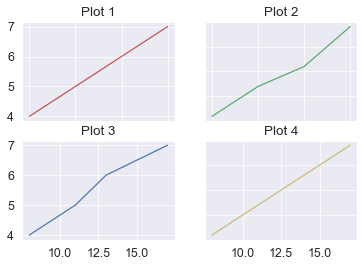

In [66]:
x=[4,5,6,7]
y=[8,11,13,17]

# creating the canvas with class 'fig'
fig, axes =plt.subplots(nrows=2, ncols=2)

# plotting graph for 1st element
axes[0][0].plot(x,x,'r')
axes[0][0].set_title('Plot 1') 
axes[0][1].plot(x,y,'g')
axes[0][1].set_title('Plot 2') 
axes[1][0].plot(y,x,'b')
axes[1][0].set_title('Plot 3') 
axes[1][1].plot(y,y,'y')
axes[1][1].set_title('Plot 4') 

for axes in fig.get_axes(): # Hide x labels and tick labels for top plots and y ticks for right plots
    axes.label_outer()
plt.show()

## 62.Display the data for all 'White Female' patients above the age of 50.

In [67]:
from datetime import date
df_WFP=df_PA
df_WFP['Age'] = 1
df_WFP
def calculate_age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

df_WFP['Age'] = df_WFP['DateOfBirth'].apply(calculate_age)

df_WFP=df_WFP.loc[(df_WFP['Race'] == 'White') & (df_WFP['Gender'] == 'Female') 
             & (df_WFP['Age'] >= 50)]
df_WFP
#print(df_PA.to_string(index=False))

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
25,26,Sally,Bing,1972-08-03 00:05:39.560,Female,White,Spanish,50
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,62
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,62
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,52
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,59


## 63 Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [68]:
df_PA.loc[101:200,"FirstName":"LastName"]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


## 64 Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)

In [69]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
print(np.matmul(a,b))

[[10 13]
 [28 40]]


## 65.Get the number of patients based on service and primary diagnosis.

In [70]:
df_RR.groupby(['Service','PrimaryDiagnosis'])['PatientID'].count().reset_index(name='Count of Patients')

,Service,PrimaryDiagnosis,Count of Patients
0,Cardiology,AMI,40
1,Cardiology,Afib,10
2,Cardiology,Broken Leg,3
3,Cardiology,Flu,2
4,Cardiology,Heart Failure,39
5,Cardiology,Kidney Failure,1
6,General Medicine,Broken Leg,3
7,General Medicine,Diabetes,38
8,General Medicine,Fever,13
9,General Medicine,Flu,54


## 66.np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.

In [71]:
a=np.arange(1,31).reshape(6,5)

print(a[[0,4,5],3:5])

[[ 4  5]
 [24 25]
 [29 30]]


## 67 Make a pivot table by the no. of patients from the admission date till discharge date.

In [72]:
df_RR['Discharge'] = df_RR['DischargeDate'].dt.date 
pivot = df_RR.pivot_table(index=['AdmissionDate','Discharge'],values=['PatientID'], aggfunc='count')
pivot

PatientID
AdmissionDate Discharge            
2018-01-01    2018-01-04          3
              2018-01-05          2
              2018-01-06          1
              2018-01-07          3
              2018-01-08          1
...                             ...
2018-02-22    2018-03-05          1
              2018-03-06          1
              2018-03-07          4
              2018-03-08          2
              2018-03-10          2

[459 rows x 1 columns]

## 68 Display the data where actual LOS is greater than expected LOS.

In [73]:
df_D_PA = df_D[["PatientID","AdmissionID","AdmissionDate","DischargeDate","PrimaryDiagnosis","ExpectedLOS"]].merge(df_PA[["PatientID","FirstName","LastName"]],
                                                          on = "PatientID")
df_ActualLOS=(df_D_PA["DischargeDate"]-df_D_PA["AdmissionDate"]).dt.days
New_df_D_PA=df_D_PA[df_D_PA['ExpectedLOS']<df_ActualLOS]
New_df_D_PA

,PatientID,AdmissionID,AdmissionDate,DischargeDate,PrimaryDiagnosis,ExpectedLOS,FirstName,LastName
1,93,257,2018-01-06,2018-01-18 02:59:04.667,Broken Leg,6.816558,Lucila,Eyers
4,103,258,2018-01-07,2018-01-15 13:32:36.157,Broken Leg,2.639297,Jethro,Wharin
5,109,395,2018-01-07,2018-01-22 17:57:37.103,Flu,2.981758,Christiano,Bonhan
6,115,396,2018-01-08,2018-01-17 02:19:05.623,Flu,4.959098,Zonnya,Frankton
8,116,259,2018-01-08,2018-01-20 03:40:53.605,Broken Leg,2.279624,Gerhold,Inc
...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Pneumonia,3.539165,Stokes,Wadeling
713,708,709,2018-02-21,2018-03-01 05:59:22.116,Diabetes,4.518876,Russel,Dudley
714,713,697,2018-02-21,2018-03-04 00:23:19.967,Pneumonia,8.542970,Konopelski,LLC
715,716,715,2018-02-21,2018-03-06 03:31:05.262,Heart Failure,11.362095,Lavena,Tidman


## 69.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [74]:
df_PA["FullName"] = df_PA["FirstName"] + df_PA["LastName"]
df = df_PA[df_PA['FullName'].str.contains('lau',case=False)] 
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,FullName
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English,60,LaurenGaskal
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English,62,LaurenFoort
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English,40,ZulaufEllingham
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English,53,ZulaufLLC
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English,61,ZulaufAlvar
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English,57,ZulaufManske
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English,55,ZulaufBitcheno
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English,52,ZulaufO'Shavlan
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English,49,LemmyKlausen
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English,43,JerrilynKlausen


## 70.Plot a graph to show the distribution of expected mortality.

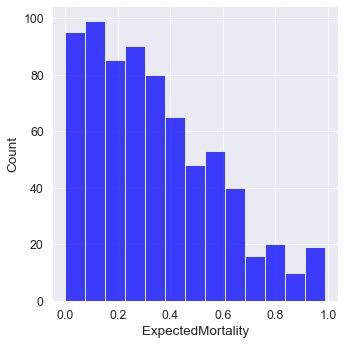

In [75]:
df_DEM=df_RR
sns.displot(df_DEM['ExpectedMortality'],color = 'blue')
plt.show()

## 71 Create a visualization on the count of patients based on primary diagnosis.

<AxesSubplot:title={'center':'Count of patients based on primary diagnosis'}, xlabel='PrimaryDiagnosis', ylabel='No of patients'>

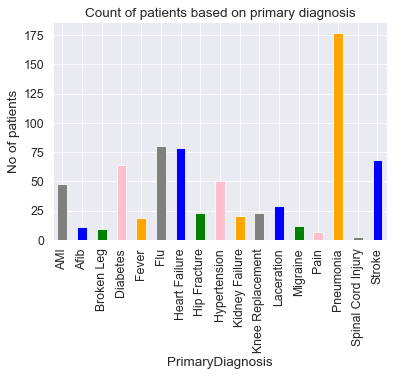

In [76]:
df_pd=df_D.groupby(['PrimaryDiagnosis']).count()['PatientID'].plot(kind='bar',ylabel='No of patients',color=['gray','blue','green','pink','orange'],title="Count of patients based on primary diagnosis")
df_pd

## 72 List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [77]:
from datetime import date
def from_dob_to_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_age=df_PA['DateOfBirth'].apply(lambda x: from_dob_to_age(x))
df_age
df_PA['Age']=df_age

result= pd.merge(df_AV,df_P, how="left", on=["ProviderID"])

filter1=(result['VisitStatus']=='Completed') &  (result['DateofVisit']>='2019-01-01') & (result['DateofVisit']<='2019-03-31') & (result['ProviderSpecialty'] == 'Surgery')
result1=result.loc[filter1]
result2 = pd.merge(result1,df_PA, how="inner", left_on="PatientMRN",right_on="PatientID")
result2.loc[(result2['Gender']=='Male') & (result2['Age']>60)][['PatientID','FirstName','LastName','Age']]

,PatientID,FirstName,LastName,Age
11,15,Gabriel,Saint,61
41,581,Constanta,Edgin,62
61,19,Daugherty,Conner,62
73,802,Berta,Loxly,61


## 73.Delete the column 'DischargeDispostion' iteratively.

In [79]:
#original DataFrame
print('Original DataFrame\n--------')
print(df_RR.columns)

#delete 'DischargeDispostion' column
df_RR_new= df_RR.drop('DischargeDisposition', axis=1, inplace=True)
print('DataFrame after deleting a Column\n---------')
print(df_RR.columns)

Original DataFrame
--------
Index(['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate',
       'DischargeDisposition', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS',
       'ExpectedMortality', 'ReadmissionFlag', 'DaysToReadmission',
       'EDVisitAfterDischargeFlag', 'Discharge'],
      dtype='object')
DataFrame after deleting a Column
---------
Index(['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate', 'Service',
       'PrimaryDiagnosis', 'ExpectedLOS', 'ExpectedMortality',
       'ReadmissionFlag', 'DaysToReadmission', 'EDVisitAfterDischargeFlag',
       'Discharge'],
      dtype='object')


## 74.Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)

In [80]:
import psycopg2

conn = psycopg2.connect(
   database="HospitalDB_New", user='postgres', password='tej', host='::1', port= 5432
)
cursor = conn.cursor()
cursor.execute('''Select distinct(extract(year from "DateofVisit")) from "AmbulatoryVisits" ''')
# Fetch all rows from database
record = cursor.fetchall()
print("Data from Database:- ", record)
conn.commit()
cursor.close()
conn.close()

Data from Database:-  [(Decimal('2019'),)]


## 75 Calculate the time spent in ED Department for each visit.

In [81]:
df_EDU['TimeSpent'] = df_EDU['EDDischargeTime']-df_EDU['VisitDate']
df_EDU['TimeSpent'] = df_EDU['TimeSpent'].astype('timedelta64[h]')
df_EDU

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,TimeSpent
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,11.0
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,23.0
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,1.0
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,1.0
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,2.0
...,...,...,...,...,...,...,...,...
940,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,discharged,15.0
941,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,discharged,22.0
942,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,discharged,4.0
943,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,discharged,6.0


## 76 Find the last name of the patients, by getting the first name from the user.

In [82]:
fName=input('What is the first name of the patient? :')
New_df_PA=df_PA[df_PA['FirstName']==fName]
print(New_df_PA.FirstName + ' ' + New_df_PA.LastName)
if New_df_PA.empty:
    print ('Patient does not exist')

What is the first name of the patient? :Zulauf
369    Zulauf Ellingham
382          Zulauf LLC
454        Zulauf Alvar
463       Zulauf Manske
818     Zulauf Bitcheno
830    Zulauf O'Shavlan
910       Zulauf Orbine
dtype: object


## 77.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

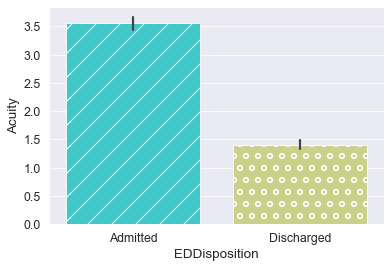

In [83]:
 a=df_EDV['Acuity']
 b=df_EDV['EDDisposition']
#plot a bar chart
 bar=sns.barplot(x=b, y=a,palette="rainbow")
#   Types of hatches
hatches =["/", "o", "*", "x", "//"]    
    
# Loop over the bars to make hatches
for i,patch in enumerate(bar.patches):
    patch.set_hatch(hatches[i])    #to set each bar differnt hatch using  set_hatch() method
    
 plt.show()

## 78.Find reasonForVisit with highest count of acuity 5 patients.

In [84]:
df2=df_EDV[['ReasonForVisit','Acuity']]
df3=df2.loc[(df2['Acuity'] == 5)]
df4=df3.groupby(['ReasonForVisit','Acuity'])['Acuity'].count().reset_index(name='CountOfAcuity')
df5=df4[df4.CountOfAcuity == df4.CountOfAcuity.max()]
print(df5)

  ReasonForVisit  Acuity  CountOfAcuity
2     Chest Pain       5             61


## 79 Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [85]:
df_pd_elos = df_RR[["PrimaryDiagnosis","ExpectedLOS"]]
df_big_diff= df_pd_elos.groupby("PrimaryDiagnosis")["ExpectedLOS"].apply(lambda x: x.max() - x.min()).nlargest(1).reset_index(name='Difference in LOS')
display(df_big_diff)  

,PrimaryDiagnosis,Difference in LOS
0,Pneumonia,14.83426


## 80 Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

In [86]:
df_P_new = df_P[["ProviderSpecialty"]]
speciality = df_P_new.groupby(["ProviderSpecialty"]).sum()
display(speciality)

""
ProviderSpecialty
Cardiology
Pediatrics
PrimaryCare
Surgery
